#**Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset**

##***Discriptive analytics for Numerical columns***

In [1]:
#Loading the dataset:
import pandas as pd
df = pd.read_csv("sales_data_with_discounts.csv")

In [2]:
print("Dataset loaded successfully.")
print(f"Rows: {df.shape[0]},columns: {df.shape[1]}")

Dataset loaded successfully.
Rows: 450,columns: 13


In [3]:
#Displaying the first 5 rows of the dataset:
df.head(5)

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
#Identifying the Numerical columns:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(exclude=["number"]).columns.tolist()
print("Numerical Columns: ",num_cols)
print("Categorical Columns: ",cat_cols)

Numerical Columns:  ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
Categorical Columns:  ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


In [5]:
#Calculating the mean, median, mode and standard deviation of the numerical columns:
stats_mean = df[num_cols].mean()
stats_median = df[num_cols].median()
stats_mode = df[num_cols].mode().iloc[0]
stats_std = df[num_cols].std()

print("Basic Descriptive Statistics:")
print("Mean:", stats_mean)
print("Median:", stats_median)
print("Mode:", stats_mode)
print("Standard Deviation:", stats_std)

Basic Descriptive Statistics:
Mean: Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64
Median: Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64
Mode: Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64
Standard Deviation: Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64


In [6]:
#Interpretation of Statistics:
for col in num_cols:
  mean_val = stats_mean[col]
  median_val = stats_median[col]
  mode_val = stats_mode[col]
  std_val = stats_std[col]

if std_val != 0:
  diff = abs(mean_val - median_val)/std_val
else :
  diff = 0

if diff < 0.3 :
  shape_comment = "The mean and median are close, so the distribution is rougly symmetric."
else :
  shape_comment = "The mean and median differ noticeably, suggestinga skewed distribution or outliers."

print(f"Column: {col}")
print(f"Mean: {mean_val}")
print(f"Median: {median_val:.2f}")
print(f"Mode: {mode_val}")
print(f"Standard Deviation: {std_val:.2f}")
print("Interpretation:")
print("The mean represents the average level of this variable.")
print("The median represents the middle value when the data is sorted.")
print("The mode is the most frequently occuring value.")
print("The standard deviation measures the spread of the data around the mean.")
print(shape_comment)

Column: Net Sales Value
Mean: 30466.336131270138
Median: 4677.79
Mode: 326.97480055470817
Standard Deviation: 46358.66
Interpretation:
The mean represents the average level of this variable.
The median represents the middle value when the data is sorted.
The mode is the most frequently occuring value.
The standard deviation measures the spread of the data around the mean.
The mean and median differ noticeably, suggestinga skewed distribution or outliers.


##***Data Visualization***

###**Histograms**

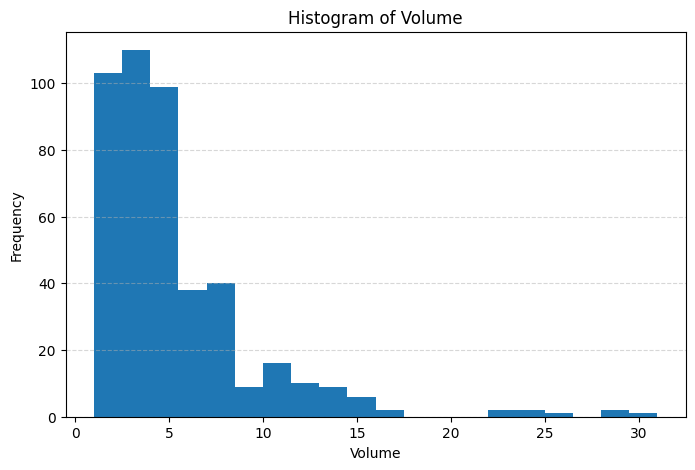

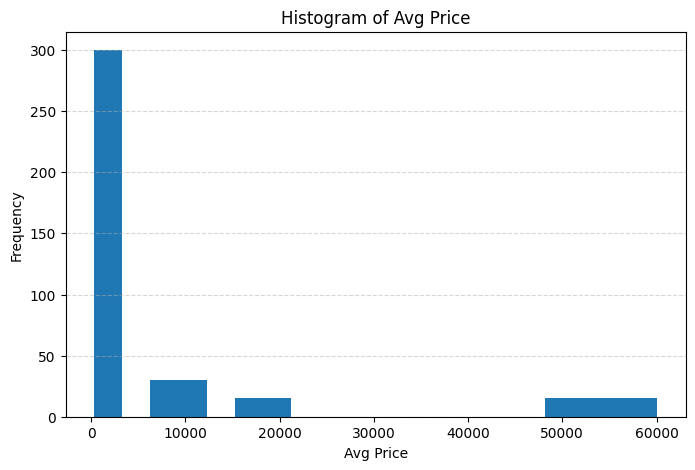

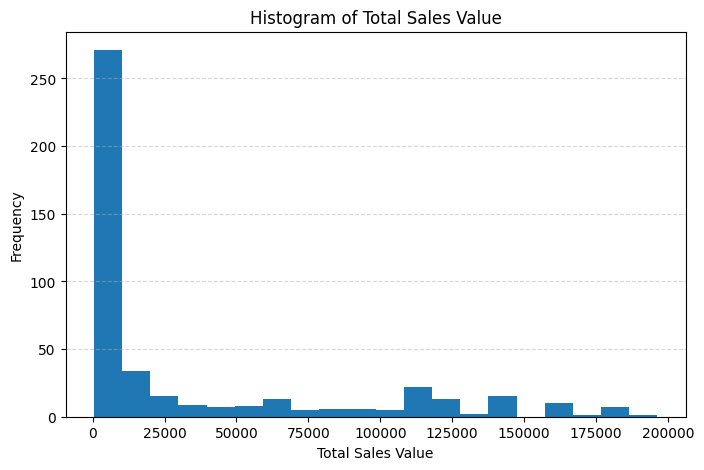

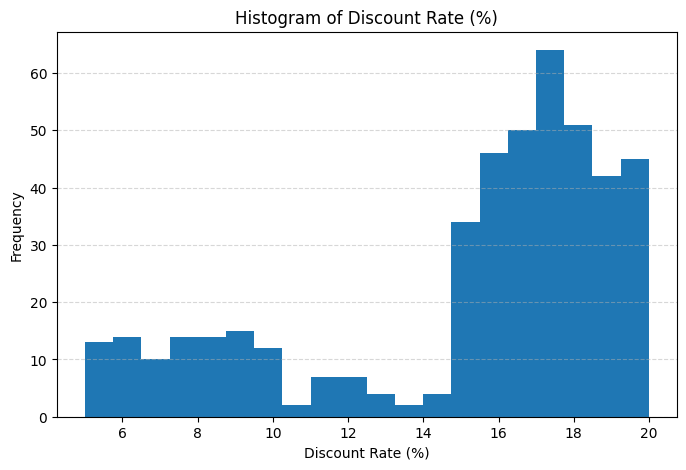

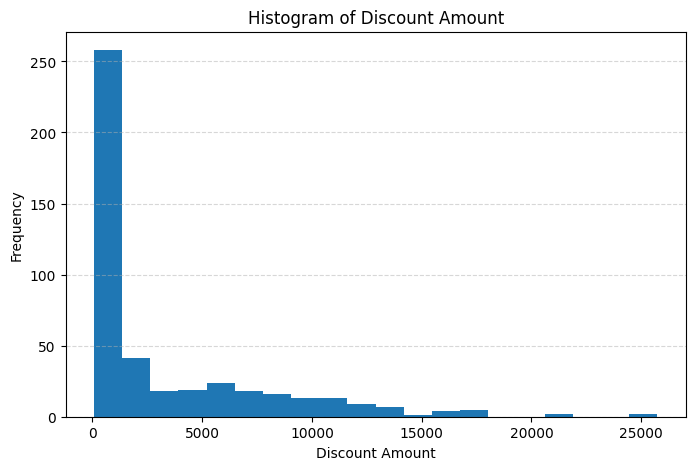

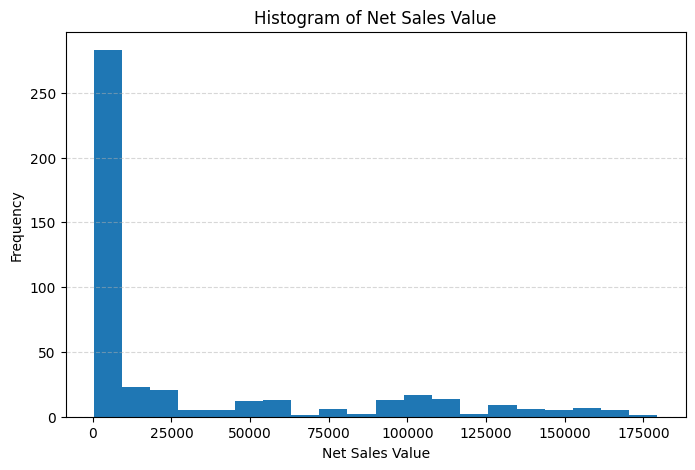

In [7]:
#Generating Histogram for numerical columns:
import matplotlib.pyplot as plt
for col in num_cols:
  plt.figure(figsize=(8,5))
  plt.hist(df[col].dropna(),bins=20)
  plt.title(f"Histogram of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.grid(axis='y',linestyle="--",alpha=0.5)
  plt.show()

###**Boxplots**

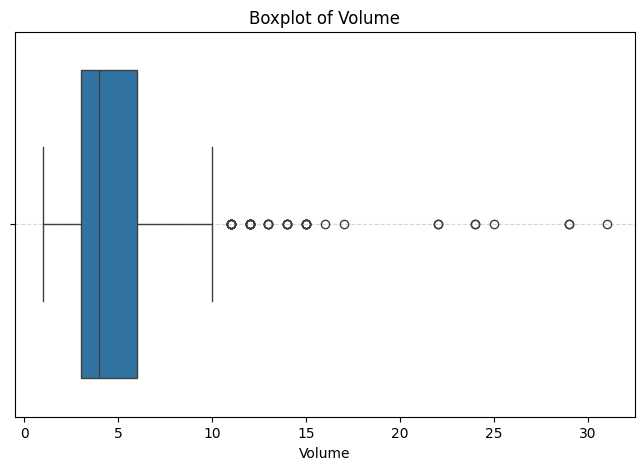

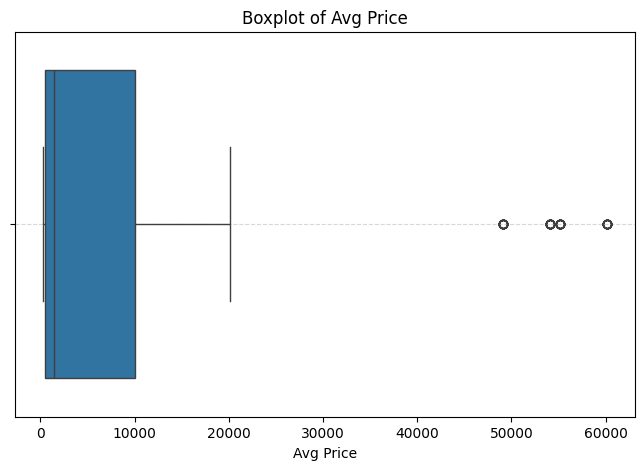

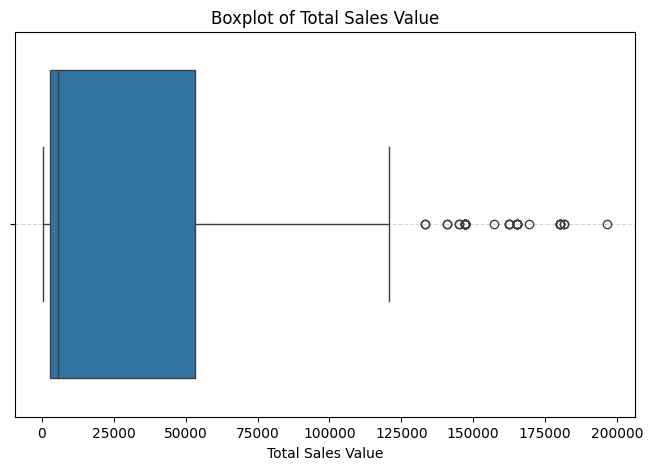

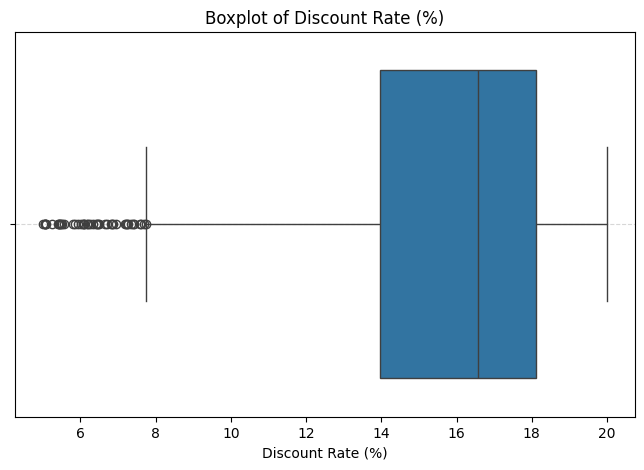

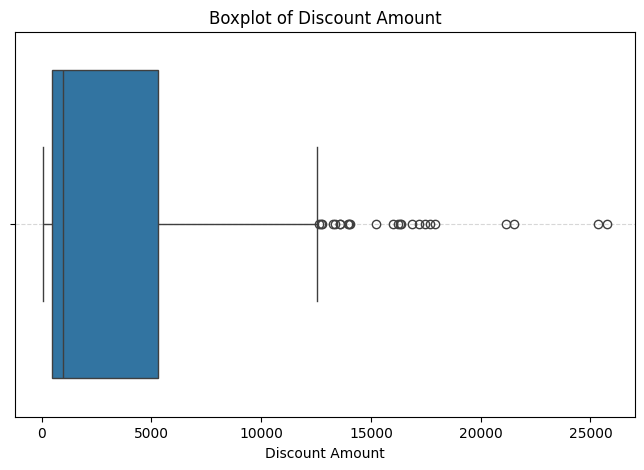

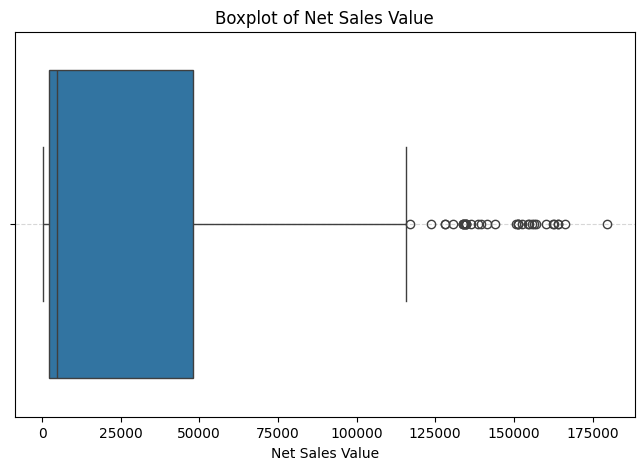

In [8]:
#Generating boxplots for numerical columns:
import seaborn as sns
for col in num_cols:
  plt.figure(figsize=(8,5))
  sns.boxplot(x=df[col].dropna())
  plt.title(f"Boxplot of {col}")
  plt.xlabel(col)
  plt.grid(axis="y",linestyle="--",alpha=0.5)
  plt.show()

###**Bar charts**

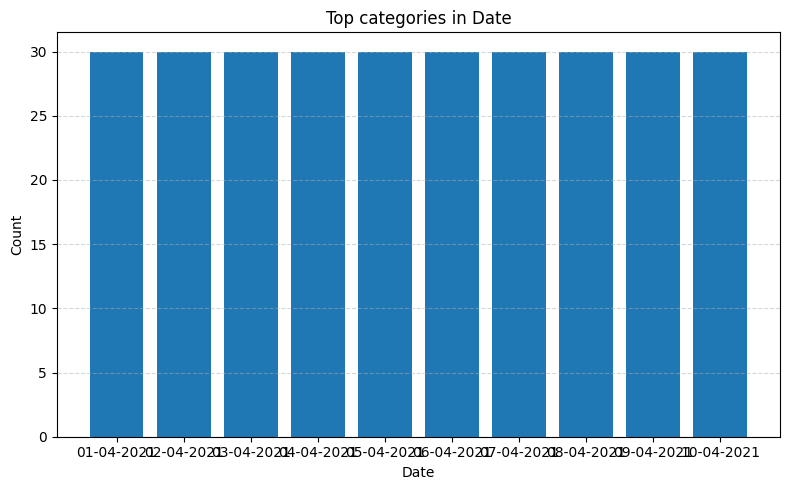

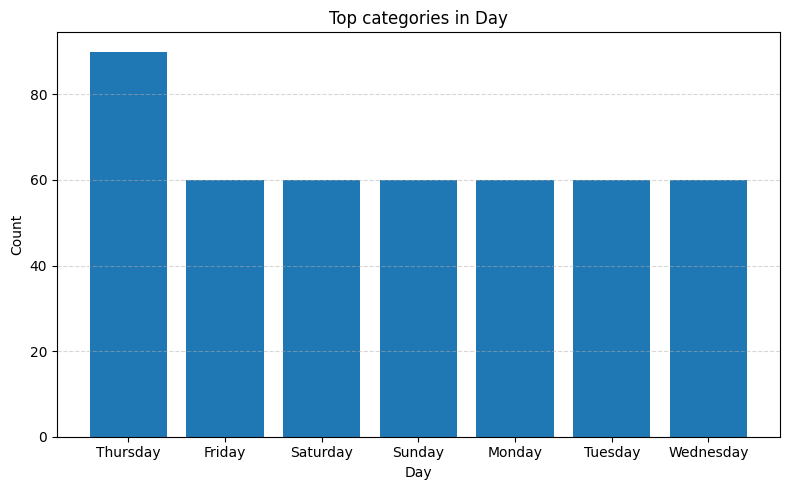

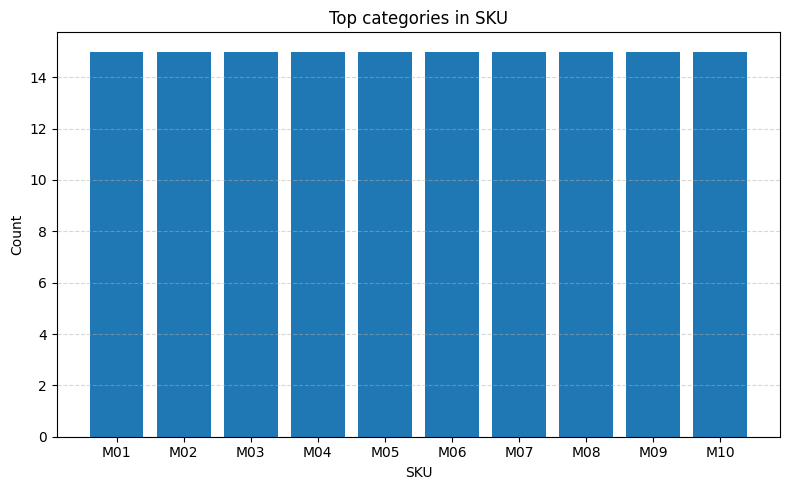

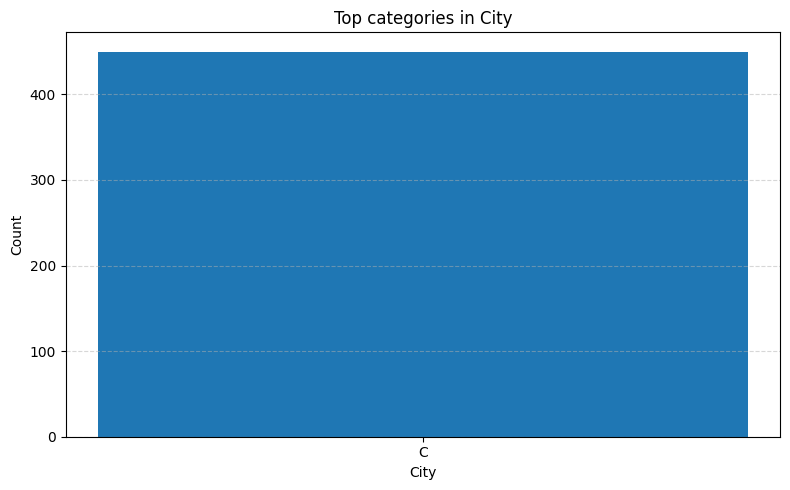

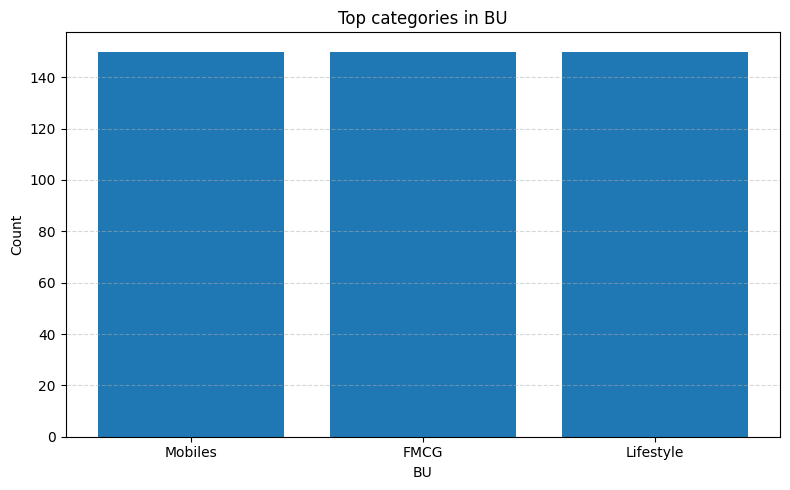

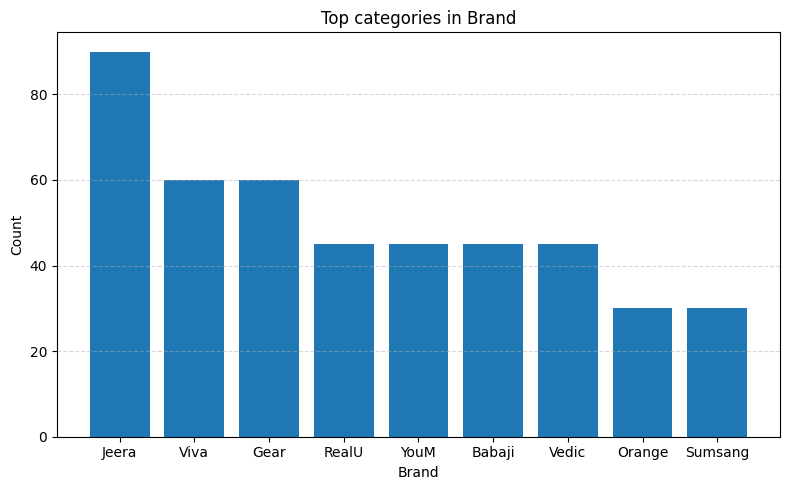

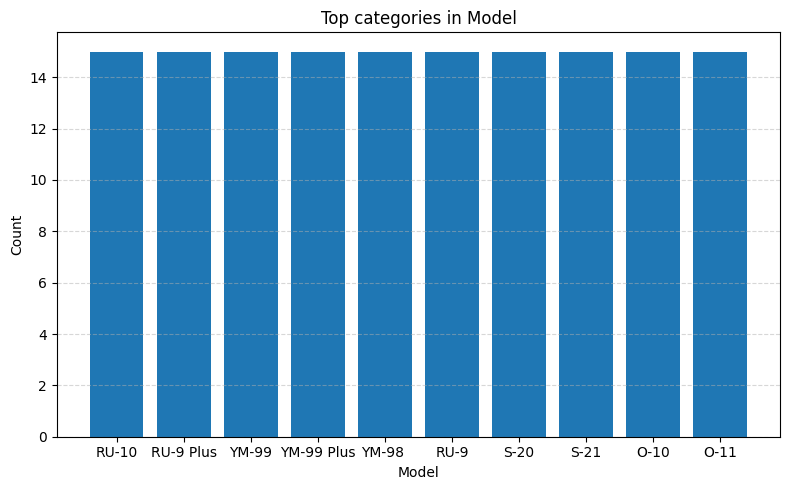

In [9]:
#Generating barcharts for categorical columns:
for col in cat_cols:
  counts = df[col].value_counts().head(10)
  plt.figure(figsize=(8,5))
  plt.bar(counts.index.astype(str),counts.values)
  plt.title(f"Top categories in {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.grid(axis="y",linestyle="--",alpha=0.5)
  plt.tight_layout()
  plt.show()


##***Summary***

In [10]:
print(f"The dataset contains {df.shape[0]} records with {len(num_cols)} numerical and {len(cat_cols)} categorical variables.")
print("The mean, median, mode and standard deviation hepl us understand the central tendency an spread of sales-related variables(volume, prices, discounts, revenue).")
print("Histograms show wether varibales are symmetric or skewed and reveal the presence of extream values")
print("Boxplots clearly highlight outliers and the interquartile range for each numeric column.")
print("Bar charts for categorical columns (like City, Brand, Model,etc) reveal which categories have the highest frequency.")

The dataset contains 450 records with 6 numerical and 7 categorical variables.
The mean, median, mode and standard deviation hepl us understand the central tendency an spread of sales-related variables(volume, prices, discounts, revenue).
Histograms show wether varibales are symmetric or skewed and reveal the presence of extream values
Boxplots clearly highlight outliers and the interquartile range for each numeric column.
Bar charts for categorical columns (like City, Brand, Model,etc) reveal which categories have the highest frequency.
